<a href="https://colab.research.google.com/github/astromar2187/Kmeans/blob/main/KMeansV1_8dados_distManhattan_K3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas:

In [24]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Criando o objeto Ponto, com quatro atributos, um referente a posição desse ponto no eixo X e outra referente a posição no eixo Y, um atributo do tipo booleano que indicará se o ponto é centróide ou não; por ultimo, um atributo indicando a qual cluster o ponto pertence:

In [25]:
class Ponto:
  def __init__(self,x,y):
    self.x = x
    self.y = y
    self.centroide = False
    self.cluster = 0

Criando a função que calculará a distancia (Manhattan) entre dois pontos quaisquer:

In [26]:
def modulo(x):
  if(x>=0):
    return x
  else: 
    return -x

In [27]:
def calcula_dist(a,b):
  d = modulo(a.x-b.x)+modulo(a.y-b.y)
  return d

Criando o array geral dos n pontos:

In [28]:
Pontos = []

Criando os pontos (fixos) e adicionando-os na lista de pontos

In [29]:
p1 = Ponto(2,10)
Pontos.append(p1)
p2 = Ponto(2,5)
Pontos.append(p2)
p3 = Ponto(8,4)
Pontos.append(p3)
p4 = Ponto(5,8)
Pontos.append(p4)
p5 = Ponto(7,5)
Pontos.append(p5)
p6 = Ponto(6,4)
Pontos.append(p6)
p7 = Ponto(1,2)
Pontos.append(p7)
p8 = Ponto(4,9)
Pontos.append(p8)

In [30]:
i=0
for Ponto in Pontos:
  print(f'Ponto p{i+1}: x: {Ponto.x} y: {Ponto.y} Centroide: {Ponto.centroide} Pertence ao cluster: {Ponto.cluster}')
  i=i+1

Ponto p1: x: 2 y: 10 Centroide: False Pertence ao cluster: 0
Ponto p2: x: 2 y: 5 Centroide: False Pertence ao cluster: 0
Ponto p3: x: 8 y: 4 Centroide: False Pertence ao cluster: 0
Ponto p4: x: 5 y: 8 Centroide: False Pertence ao cluster: 0
Ponto p5: x: 7 y: 5 Centroide: False Pertence ao cluster: 0
Ponto p6: x: 6 y: 4 Centroide: False Pertence ao cluster: 0
Ponto p7: x: 1 y: 2 Centroide: False Pertence ao cluster: 0
Ponto p8: x: 4 y: 9 Centroide: False Pertence ao cluster: 0


Guardando os valores das coordenadas em dois vetores distintos: (Será útil para geração dos gráficos)

In [33]:
vet_x = []
vet_y = []


In [34]:
for Ponto in Pontos:
  vet_x.append(Ponto.x)
  vet_y.append(Ponto.y)


Gerando o gráfico base:

In [35]:
fig = px.scatter(x=vet_x, y=vet_y, log_y=False, width=500)
fig.update_traces(marker = dict(size = 10, line=dict(width = 1)), selector = dict(mode = 'markers'))
fig.update_yaxes(title = 'Y')
fig.update_xaxes(title = 'X')
fig.show()

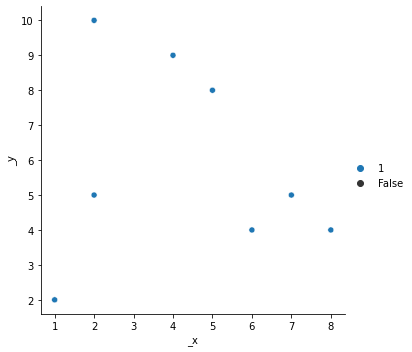

In [44]:
sns.relplot(x=vet_x, y=vet_y, hue=Ponto.cluster, style=Ponto.centroide)

Definindo quais, dentre esses pontos, serão os centróides (nessa versão os primeiros são fixos e pré-definidos):

In [37]:
p1.centroide = True
p4.centroide = True
p7.centroide = True
p2.centroide = False

Criando uma função que cria uma lista com os centroides, sejam os definidos inicialmente ou os próximos (A função limpa a lista de centroides a cada vez que for chamada):

In [38]:
centroides = []

In [39]:
def att_lista_centroides():
  centroides.clear()
  for p in Pontos:
    if(p.centroide==True):
      centroides.append(p)
      print(f'({p.x},{p.y})')

In [40]:
att_lista_centroides()

(2,10)
(5,8)
(1,2)


Agora, criaremos uma lista com três listas, representando os três clusteres, que armazenarão os pontos de acordo com os calculos de distância.

In [41]:
clust = [[], [], []]

Em seguida, separamos os pontos considerando qual centróide está mais perto de cada ponto.

In [42]:
for ponto in Pontos:
  dist = []
  for c in centroides:
    d = calcula_dist(c, ponto)
    dist.append(d)
  print(dist)
  index = dist.index(min(dist))
  clust[index].append(ponto)
  ponto.cluster = index


[0, 5, 9]
[5, 6, 4]
[12, 7, 9]
[5, 0, 10]
[10, 5, 9]
[10, 5, 7]
[9, 10, 0]
[3, 2, 10]


In [43]:
i = 0
for c in clust:
  print(f'cluster {i+1}')
  for ponto in c:
    print(f'({ponto.x},{ponto.y})')
  i=i+1

cluster 1
(2,10)
cluster 2
(8,4)
(5,8)
(7,5)
(6,4)
(4,9)
cluster 3
(2,5)
(1,2)
